In [1]:
import numpy as np
import matplotlib
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import load_model,Model
import math
import random

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(60000,784) # 将图片摊平，变成向量
x_test = x_test.reshape(10000,784) # 对测试集进行同样的处理

In [4]:
x_best=np.array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.82416132e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.53874042e-02,
       9.82531573e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.01544016e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.27169719e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.14082103e-03,
       1.09794058e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.47865213e-01,
       3.80461304e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.39236389e-01, 0.00000000e+00, 0.00000000e+00,
       1.40403362e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.56734760e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.81045430e-01, 5.57972619e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.02540727e-02, 0.00000000e+00,
       0.00000000e+00, 3.17309238e-01, 0.00000000e+00, 0.00000000e+00,
       9.98775872e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.89789880e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.71498248e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.17820167e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.29411765e-01, 7.25490196e-01,
       6.23529412e-01, 5.92156863e-01, 2.37560383e-01, 1.39369998e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.91922698e-02, 1.02890481e-03, 4.90538713e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.69058340e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.70588235e-01, 9.96078431e-01,
       9.96078431e-01, 9.96078431e-01, 9.96078431e-01, 9.45098039e-01,
       7.76470588e-01, 7.76470588e-01, 7.76470588e-01, 7.76470588e-01,
       7.76470588e-01, 7.76470588e-01, 7.76470588e-01, 7.76470588e-01,
       6.66666667e-01, 2.03921569e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.71860516e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.47994975e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.62745098e-01, 4.47058824e-01,
       2.82352941e-01, 4.47058824e-01, 6.39215686e-01, 8.90196078e-01,
       9.88559658e-01, 1.22670150e-03, 9.96078431e-01, 9.96078431e-01,
       9.96078431e-01, 2.33115292e-01, 8.98039216e-01, 9.96078431e-01,
       9.96078431e-01, 5.51044376e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.66666667e-02,
       2.58823529e-01, 5.49019608e-02, 2.62745098e-01, 2.62745098e-01,
       2.59784407e-03, 2.31372549e-01, 8.23529412e-02, 9.24511569e-01,
       9.96078431e-01, 8.71884675e-03, 0.00000000e+00, 1.37500693e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.75288128e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.33037159e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.76156429e-03,
       0.00000000e+00, 0.00000000e+00, 3.25490196e-01, 9.92156863e-01,
       8.19607843e-01, 7.12216672e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.20482950e-01, 0.00000000e+00,
       7.78756793e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.49025828e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.54747387e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.62745098e-02, 9.13725490e-01, 1.00000000e+00,
       3.25490196e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.13978527e-03, 0.00000000e+00, 6.06879069e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.96559772e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.01791102e-02,
       0.00000000e+00, 5.05882353e-01, 9.96078431e-01, 9.33333333e-01,
       1.72549020e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.49574715e-03, 0.00000000e+00,
       0.00000000e+00, 5.55308370e-04, 0.00000000e+00, 0.00000000e+00,
       1.02651850e-03, 0.00000000e+00, 0.00000000e+00, 6.65233880e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.97774085e-01,
       0.00000000e+00, 0.00000000e+00, 9.86856008e-01, 0.00000000e+00,
       2.31372549e-01, 9.66904551e-01, 9.96357488e-01, 2.44432354e-01,
       0.00000000e+00, 0.00000000e+00, 3.64091543e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.53647705e-04, 0.00000000e+00,
       0.00000000e+00, 9.98884153e-01, 0.00000000e+00, 0.00000000e+00,
       6.57451800e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.12373655e-01, 9.96078431e-01, 7.33333333e-01, 1.96078431e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.09989967e-04, 1.03371118e-02,
       0.00000000e+00, 1.02168046e-03, 8.14755393e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.79027630e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.52941176e-02,
       8.03921569e-01, 9.72549020e-01, 2.27450980e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.54424551e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.65533547e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.67551475e-02,
       2.31344706e-03, 0.00000000e+00, 0.00000000e+00, 5.01853146e-04,
       0.00000000e+00, 0.00000000e+00, 9.92167654e-04, 4.94117647e-01,
       9.96078431e-01, 5.92280359e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.03801587e-01, 0.00000000e+00,
       2.17977286e-02, 9.75590028e-01, 9.98259792e-01, 1.33588178e-02,
       0.00000000e+00, 0.00000000e+00, 2.81702035e-02, 9.80570288e-01,
       1.45637768e-01, 9.94768700e-01, 0.00000000e+00, 9.76579294e-01,
       0.00000000e+00, 0.00000000e+00, 2.47766103e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.94117647e-01, 9.84313725e-01,
       9.18004881e-01, 2.23529412e-01, 0.00000000e+00, 0.00000000e+00,
       9.79595571e-01, 9.20347655e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.09248370e-02, 0.00000000e+00, 8.34274889e-05,
       9.21513376e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.21128771e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.45098039e-02, 8.66666667e-01, 9.95452570e-01,
       6.50980392e-01, 0.00000000e+00, 9.94879142e-01, 9.90876048e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.92632556e-01, 0.00000000e+00, 0.00000000e+00,
       9.33838499e-01, 8.03458978e-04, 9.96078431e-01, 8.58823529e-01,
       1.37254902e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.64974046e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.60951806e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.18348369e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.32002857e-04, 0.00000000e+00,
       1.49485141e-01, 9.96078431e-01, 9.96078431e-01, 3.01967385e-01,
       3.86528748e-01, 0.00000000e+00, 9.15565937e-01, 1.08826148e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.55187882e-03, 0.00000000e+00, 2.81684325e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.64333267e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.95071345e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.76535759e-03, 1.21568627e-01,
       8.78431373e-01, 9.96078431e-01, 4.50980392e-01, 3.92156863e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.79942822e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.20074175e-02, 9.96208244e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.49304180e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.21568627e-01,
       9.94786070e-01, 9.96078431e-01, 2.04684581e-01, 3.12358102e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.05652053e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.62858996e-03, 0.00000000e+00, 0.00000000e+00, 1.06949614e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.47678198e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.33929009e-01, 5.46809694e-01,
       9.96078431e-01, 9.96078431e-01, 2.03921569e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.20868094e-02, 2.46029328e-05,
       0.00000000e+00, 0.00000000e+00, 9.62916021e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.74509804e-01, 9.96078431e-01,
       9.96078431e-01, 8.58823529e-01, 1.34283145e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.74509804e-01, 9.96078431e-01,
       8.11764706e-01, 7.05882353e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.60322645e-02, 3.65584979e-03, 0.00000000e+00,
       9.99163461e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.68973095e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.49235547e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.18746243e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.66868676e-03, 0.00000000e+00, 0.00000000e+00,
       9.72211110e-01, 0.00000000e+00, 0.00000000e+00, 1.47647878e-03])

In [5]:
x_dif = x_best-x_test[0]/255
x_dif

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.82416132e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.53874042e-02,
        9.82531573e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.01544016e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [6]:
for i in range(784):
    if abs(x_dif[i]) < 1.00000000e-05:
        x_dif[i] = 0.00000000e+00
print(x_dif)

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.82416132e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.53874042e-02
  9.82531573e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.01544016e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.27169719e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [7]:
# test
count = 0
for i in range(784):
    if x_dif[i] != 0:
        count+=1
print(count)

137


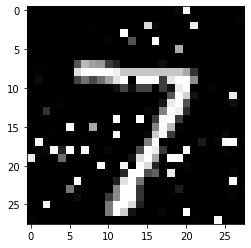

In [13]:
# test
x_re = x_dif+x_test[0]/255
re = x_re.reshape(28,28)
plt.imshow(re,cmap='gray')
plt.show()

In [8]:
model = load_model('mnist_model.h5')

In [15]:
# test
result=model.predict(re.reshape(1,784))
result[0][7]

0.3976271

In [9]:
def Func(x):
    d3 = x+x_test[0]/255
    result=model.predict(d3.reshape(1,784))
    return result[0][7]

0.3978209
0.3982334
0.40174162
0.40163475
0.39842936
0.40075046
0.39916515
0.3976271
0.39966995
0.3990956
0.4029773
0.4001707
0.39921245
0.39906922
0.39981455
0.3987212
0.40245998
0.40119162
0.39872178
0.39984465
0.399135
0.4014943
0.39916515
0.4044023
0.3986274
0.39805505
0.39847726
0.4007845
0.39994386
0.39999312
0.39854568
0.39883867
0.40031806
0.40083694
0.3999743
0.39898145
0.39935598
0.40031993
0.3976271
0.3988621
0.39994082
0.40064546
0.4072664
0.40476125
0.399545
0.399387
0.39830136
0.3991306
0.39942142
0.40059283
0.40505987
0.40160826
0.39985028
0.40082645
0.4000714
0.39869726
0.40466687
0.4006584
0.4014235
0.39781603
0.39801455
0.3983703
0.39916635
0.39965594
0.40173945
0.3993055
0.3976271
0.4046111
0.39781284
0.40211543
0.40008947
0.3999108
0.39852616
0.3976271
0.39853126
0.39955455
0.39919105
0.39926142
0.40124992
0.39984974
0.3987743
0.40108505
0.40344277
0.39924726
0.4009993
0.40041983
0.39835924
0.3976271
0.40309495
0.3976271
0.3995103
0.4045294
0.39996707
0.4020012
0.40

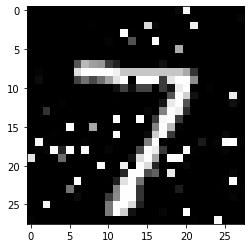

0.39968008
0.39845622
0.40205315
0.40161586
0.40141335
0.40001062
0.4011545
0.3993882
0.39947128
0.40029153
0.39814726
0.39910552
0.3990245
0.4011102
0.39973986
0.39873606
0.39877447
0.4018019
0.39983207
0.39756435
0.4005577
0.39941803
0.4042558
0.4019214
0.40447295
0.39756435
0.40174633
0.39906806
0.39871937
0.40083036
0.39789587
0.39930838
0.3993939
0.39756435
0.39838728
0.39756435
0.39921048
0.39939058
0.3989963
0.4015689
0.40141296
0.39756435
0.40060803
0.40218306
0.4013998
0.3984402
0.40082076
0.39871144
0.40249804
0.3991881
0.39908168
0.40379328
0.39981306
0.4004426
0.3996279
0.40024483
0.4001636
0.40131652
0.39971247
0.40138358
0.40284866
0.4011542
0.40070528
0.40040228
0.39929253
0.39935356
0.40172085
0.39756435
0.39834645
0.39978436
0.40015244
0.40018585
0.3983145
0.39947903
0.4014688
0.3994937
0.4018645
0.4025739
0.40313458
0.39971387
0.3991819
0.4005607
0.40101764
0.39773482
0.3997093
0.399262
0.4023379
0.40404415
0.39957663
0.40046352
0.40190804
0.40007588
0.40308365
0.3986

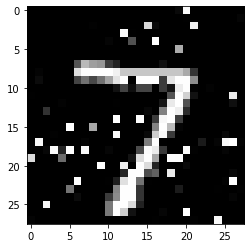

0.39901835
0.39872983
0.40261206
0.39925325
0.39951485
0.40494996
0.40014878
0.40387294
0.3980881
0.39882573
0.3975307
0.4005575
0.4014287
0.39937967
0.401582
0.39891246
0.39826795
0.40210122
0.3976875
0.40086785
0.3982568
0.39829963
0.4001097
0.40363005
0.40155232
0.4001385
0.4009007
0.4015956
0.39881012
0.40416315
0.4027172
0.40132752
0.40095165
0.3994295
0.40164492
0.40202242
0.4000269
0.3996138
0.39830542
0.4024239
0.39860144
0.4017233
0.39845306
0.40398487
0.3975307
0.3992109
0.399242
0.39874634
0.40465164
0.40008217
0.39908338
0.40015453
0.39845034
0.3980782
0.4046638
0.39859483
0.40213686
0.40312147
0.4003225
0.4022174
0.39907193
0.39884305
0.3986772
0.3986253
0.4010275
0.3994251
0.39835197
0.40080807
0.39890388
0.3987144
0.40199772
0.39971358
0.39921704
0.39980614
0.40033
0.39969483
0.4009815
0.39919454
0.39982608
0.39982608
0.4010671
0.39976346
0.40157562
0.40100306
0.40065047
0.40126956
0.39956808
0.39813823
0.39944413
0.3985752
0.39832494
0.4020928
0.4015936
0.40228897
0.401

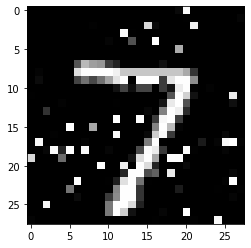

0.40290412
0.40144068
0.40219796
0.3985903
0.4038376
0.4027476
0.39913124
0.39845875
0.4036032
0.40221724
0.40164784
0.40115374
0.3975081
0.3980735
0.39975947
0.39803186
0.4055895
0.40035316
0.40307587
0.39792928
0.39896423
0.40363356
0.39853716
0.3997547
0.4008286
0.39917418
0.39844853
0.40276334
0.39778876
0.40338477
0.3998094
0.39850405
0.40033555
0.40228385
0.40294427
0.40064606
0.40054733
0.3993015
0.40091032
0.39860064
0.39827996
0.40210482
0.3978399
0.40073952
0.40165254
0.40128982
0.40025005
0.40498236
0.39757514
0.398168
0.40204513
0.39991823
0.39998275
0.3996547
0.39870727
0.39963806
0.3991641
0.39951935
0.39853436
0.4008528
0.40159512
0.40244445
0.39879146
0.39996544
0.39822918
0.40076903
0.39793578
0.4016624
0.39968425
0.4011243
0.40167612
0.40019062
0.39898562
0.39937624
0.39799988
0.4029552
0.39809304
0.40293583
0.3990495
0.40022835
0.40009317
0.40135756
0.39994112
0.4004817
0.39764863
0.40006134
0.3993714
0.39774197
0.39989585
0.39962557
0.40027845
0.3981074
0.39948416
0

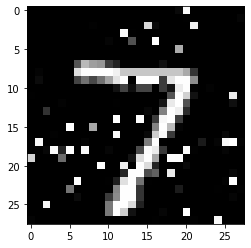

0.39920872
0.3983358
0.39842537
0.39806104
0.39815938
0.40232608
0.40048352
0.3984628
0.39974317
0.399266
0.4000275
0.4008064
0.40195766
0.40217805
0.39823258
0.400101
0.4009197
0.4025902
0.39865813
0.4008039
0.40211833
0.39908275
0.3987726
0.40259594
0.39991772
0.40100417
0.4013059
0.40083686
0.40231502
0.39880717
0.40009445
0.3984559
0.4008398
0.39995474
0.39834982
0.39788625
0.4009747
0.3999905
0.3991773
0.40026793
0.397497
0.3978465
0.40085652
0.3990699
0.4014092
0.39896095
0.40046808
0.39921233
0.40167838
0.39872873
0.39972273
0.40146738
0.39989138
0.398719
0.40110892
0.39824143
0.4030536
0.4001014
0.4018377
0.40257525
0.40171194
0.40058467
0.4005452
0.39969453
0.39962962
0.3980712
0.40222737
0.3999155
0.40077832
0.40101063
0.4009872
0.40047818
0.397497
0.40118563
0.39949587
0.4010726
0.39943445
0.40183577
0.39799857
0.4014724
0.4009347
0.40003955
0.40175122
0.39804402
0.39858413
0.40131673
0.39873078
0.3982132
0.4003034
0.40191168
0.39917305
0.401423
0.397497
0.40047145
0.4001609

0.39970678
0.39961967
0.39856875
0.39813894
0.40307778
0.3994002
0.40110096
0.40164003
0.40346542
0.399376
0.39926648
0.39824143
0.3983499
0.4005023
0.3987828
0.39972255
0.3978459
0.40049776
0.39855263
0.39927113
0.3980181
0.40001678
0.4007808
0.40030056
0.3989578
0.4011504
0.40157798
0.3983312
0.39823553
0.40091622
0.40157905
0.397497
0.397497
0.4024225
0.39941645
0.3986052
0.39899215
0.40225622
0.39903706
0.40074468
0.4017056
0.3993172
0.40021858
0.4021863
0.39949796
0.39987576
0.40505204
0.4024261
0.40072194
0.40278012
0.39893952
0.39910564
0.40020546
0.4030582
0.40165552
0.39850992
0.4054706
0.40058812
0.39798856
0.39991164
0.4039131
0.40105176
0.3981586
0.40093553
0.39805362
0.40349832
0.39878076
0.402503
0.40098533
0.39999345
0.40156153
0.40014452
0.3980992
0.3986221
0.4010794
0.39799413
0.40443835
0.39833665
0.4009299
0.39815134
0.40106383
0.40352064
0.40274182
0.40034226
0.3979672
0.3993477
0.39828336
0.40395316
0.39930993
0.39932042
0.3982521
0.40061557
0.40031615
0.3998736
0.

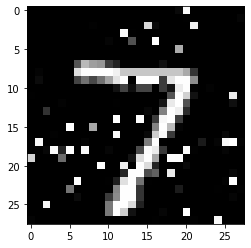

最终置信度： 0.397497
[5.0988076e-03 1.8825780e-03 1.7730339e-01 3.9966252e-01 1.9632887e-04
 5.0683231e-03 9.1743314e-05 3.9749700e-01 6.3320426e-03 6.8672248e-03]


In [12]:
import copy
x_t = copy.deepcopy(x_dif)
count = 0
for t in range(100):     # 累计迭代次数
    x_d3 = copy.deepcopy(x_t)
    con = 0
    while con < 1000:      # 未能维持置信度的循环上限     
        for i in range(784):    # 误差减小操作
            x= random.randint(0,10000)/10000
            if x <= 0.1:
                if x_d3[i] > 0.10000000e+00:
                    x_d3[i] = x_d3[i] - random.randint(0,3)/100
                    if x_d3[i] < 0:
                            x_d3[i] = 0
        
                elif x_d3[i] < -0.10000000e+00:
                    x_d3[i] = x_d3[i] + random.randint(0,3)/100
                    if x_d3[i] > 0:
                        x_d3[i] = 0
        print(Func(x_d3))
        con += 1
        if Func(x_d3) < Func(x_t):
            x_t = x_d3
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_t))
            t3 = x_t+x_test[0]/255
            plt.imshow(t3.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_d3 = copy.deepcopy(x_t)
    if con == 1000:
        print("迭代失败")
        break
    
t3 = x_t+x_test[0]/255
plt.imshow(t3.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(t3.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

0.5882801
0.41314432
0.48962095
0.5040538
0.48392755
0.44195434
0.49371
0.47091582
0.45266315
0.48482674
0.5025727
0.58930624
0.47167948
0.68654644
0.57109725
0.4767718
0.5196079
0.4746884
0.46428615
0.54523003
0.42289886
0.5612642
0.56592417
0.5158998
0.5223022
0.49339518
0.52947426
0.5735493
0.5304615
0.3967512
迭代: 1
置信度： 0.3967512


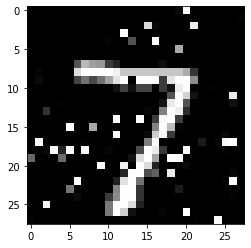

0.42102656
0.5321845
0.63623756
0.5446962
0.466768
0.51364213
0.5009504
0.4394544
0.5546803
0.45641905
0.48467082
0.40192425
0.47716263
0.49379423
0.52809304
0.49000156
0.4033376
0.48401856
0.4961732
0.4087288
0.49035093
0.46347293
0.46023738
0.50178325
0.44223914
0.5176203
0.7092533
0.48666695
0.46663663
0.46255764
0.4644897
0.4684267
0.4731478
0.49037462
0.4269565
0.4829817
0.4452875
0.4952344
0.46009028
0.47827375
0.532457
0.6538028
0.5140676
0.58588946
0.5378511
0.53226477
0.49333018
0.44841698
0.5222379
0.39895943
0.54549134
0.48805833
0.58293074
0.5924903
0.4541846
0.47957632
0.46903676
0.6688987
0.58581084
0.44388562
0.46624348
0.5407123
0.45722696
0.5081121
0.44165054
0.4927704
0.57237464
0.4689448
0.50659114
0.5726779
0.5172175
0.48626715
0.4616346
0.5347774
0.46577486
0.43625528
0.5087237
0.63530743
0.5454221
0.4314035
0.48383307
0.48162338
0.50545084
0.4715754
0.45552993
0.63324064
0.42308027
0.5526951
0.4735429
0.46873567
0.563155
0.4949585
0.47420487
0.58243906
0.65307677


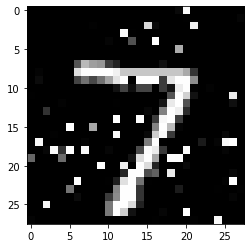

0.44932222
0.4942778
0.42610946
0.39458728
迭代: 3
置信度： 0.39458728


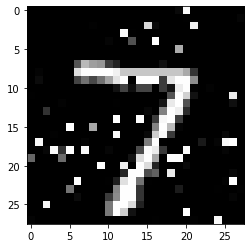

0.47038174
0.41633648
0.49285072
0.430108
0.53610593
0.4748615
0.518223
0.44187385
0.4597542
0.4248987
0.46701992
0.6627026
0.4682835
0.4473741
0.52307236
0.47747922
0.5322233
0.57642573
0.49564493
0.6304308
0.555837
0.51745415
0.43305996
0.5154683
0.56997615
0.4238542
0.4963845
0.43378407
0.50702417
0.39647195
0.52866817
0.63568
0.5031051
0.45698
0.4250004
0.4375436
0.4289816
0.54379714
0.50476456
0.60572165
0.41537163
0.49964732
0.42771983
0.59139884
0.5014543
0.44487473
0.45140904
0.5393335
0.49080795
0.50281036
0.45836842
0.5092554
0.43874258
0.5343067
0.4722197
0.5476023
0.5699458
0.461789
0.41606668
0.5400259
0.4705638
0.4099845
0.53772104
0.4118883
0.4984646
0.5104937
0.5251392
0.5153703
0.46115673
0.4209745
0.428057
0.47697353
0.43241143
0.6103401
0.43839929
0.39673987
0.48798758
0.5786185
0.55736786
0.4572842
0.48085847
0.48201272
0.48726296
0.5210257
0.43494177
0.4665677
0.46514872
0.47120938
0.40235057
0.39435893
迭代: 4
置信度： 0.39435893


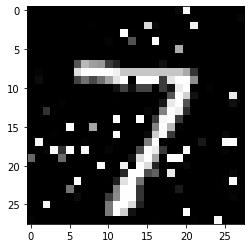

0.41333336
0.39402884
迭代: 5
置信度： 0.39402884


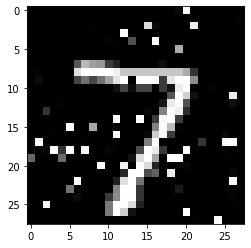

0.43027508
0.5135834
0.54052436
0.5404705
0.44972062
0.4909601
0.4440827
0.48697856
0.55480254
0.44911078
0.591782
0.49246237
0.4841207
0.42632002
0.47653642
0.43432534
0.5200565
0.5774069
0.4681704
0.5065188
0.49174458
0.44254458
0.4446409
0.4254603
0.5002944
0.48623472
0.5428973
0.4929503
0.5474572
0.43111327
0.49880174
0.4277912
0.41890723
0.58571744
0.46085212
0.46134055
0.659724
0.6455081
0.5170627
0.45868704
0.41462088
0.44782326
0.47941318
0.4639317
0.5739192
0.4931368
0.42972058
0.5640067
0.44036773
0.617377
0.55719155
0.49726075
0.5163266
0.45597056
0.4313895
0.45047614
0.45555288
0.59557253
0.45464265
0.67249656
0.44751137
0.4955092
0.48004484
0.5043667
0.53113425
0.57045364
0.4571422
0.44296396
0.39376393
迭代: 6
置信度： 0.39376393


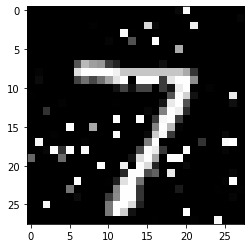

0.6501571
0.61102915
0.4716969
0.46338403
0.42504466
0.48633075
0.57762206
0.4862079
0.49356616
0.54792804
0.48731408
0.43973988
0.4168234
0.472031
0.4102058
0.42948812
0.54225767
0.47860962
0.5011529
0.55250883
0.4044583
0.44369188
0.41856945
0.4003564
0.49511963
0.45752046
0.4077801
0.4953285
0.5089086
0.48195568
0.6367968
0.5524803
0.42696851
0.5651447
0.42092925
0.4301305
0.49349996
0.5349552
0.48030436
0.43870237
0.52255493
0.3936738
迭代: 7
置信度： 0.3936738


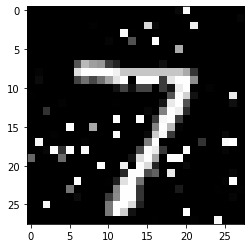

0.52381486
0.52144134
0.45258442
0.4978537
0.42377058
0.606973
0.4300195
0.44819805
0.5843996
0.4755821
0.52496535
0.534742
0.49466726
0.6092845
0.46332374
0.44709542
0.46849495
0.46677804
0.4188421
0.43208468
0.47941467
0.5156367
0.4474813
0.549819
0.5139689
0.400267
0.5418166
0.458705
0.5926765
0.45066082
0.50288737
0.43388173
0.5095346
0.44965267
0.5345035
0.4569339
0.45419374
0.46743453
0.4113895
0.47665384
0.535083
0.46354777
0.5426739
0.47268328
0.5708207
0.43372694
0.46542382
0.4867734
0.49883983
0.456505
0.55807614
0.55014306
0.509914
0.40223208
0.4428097
0.47146416
0.46249104
0.43727586
0.43062067
0.4752908
0.53423035
0.42960128
0.64454204
0.4811514
0.42011112
0.43146935
0.41174367
0.5992426
0.6670549
0.47867215
0.51726586
0.4997271
0.43884817
0.43994707
0.4238026
0.4320565
0.44568557
0.60015285
0.43597093
0.539683
0.5088166
0.45720097
0.42069817
0.4290903
0.43663877
0.48749426
0.4152053
0.40310764
0.56444234
0.42336908
0.41132265
0.5294702
0.47305673
0.65565306
0.4655195
0.49

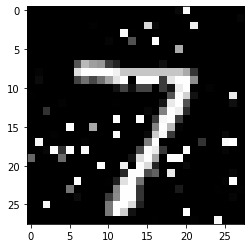

0.5205636
0.48868486
0.43780777
0.5392044
0.47379822
0.4581016
0.6647526
0.4860967
0.5410451
0.4980526
0.53341633
0.4850547
0.48024288
0.46799922
0.4103908
0.51103705
0.48333347
0.3936519
0.5606387
0.39425075
0.5724542
0.3935674
迭代: 9
置信度： 0.3935674


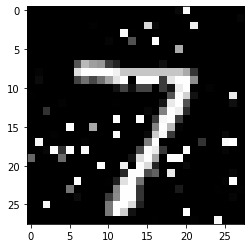

0.50815773
0.46472198
0.4390664
0.5880559
0.5107688
0.4191304
0.39473906
0.42341003
0.5183189
0.446195
0.4426889
0.45856178
0.4487607
0.43285486
0.47469318
0.5694738
0.4896726
0.63616383
0.48066947
0.44139546
0.42081
0.5116298
0.45267802
0.44779006
0.5810858
0.5033141
0.49755487
0.47975728
0.44357845
0.506445
0.51960415
0.49976557
0.4789636
0.65761554
0.4139931
0.46698648
0.5347312
0.43674716
0.43857053
0.5718237
0.5374626
0.4653267
0.6273839
0.5420115
0.52813536
0.4996811
0.46113458
0.43948585
0.51185906
0.48551497
0.51899904
0.4811003
0.5954498
0.5714728
0.5024466
0.4048899
0.4958418
0.47382098
0.54031885
0.54430354
0.4575645
0.3994065
0.5234753
0.4967267
0.436838
0.50430894
0.48736623
0.56101537
0.41832042
0.43414217
0.5205773
0.42152005
0.4692918
0.5747558
0.45720893
0.56157607
0.5199097
0.45518076
0.46293774
0.52850664
0.47481474
0.5870944
0.5031156
0.42927563
0.4228172
0.42063564
0.46811417
0.47744372
0.6051395
0.4667209
0.498509
0.47565776
0.392609
迭代: 10
置信度： 0.392609


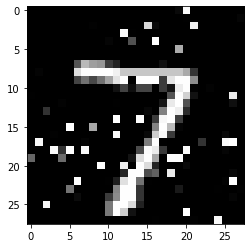

0.66113776
0.46909988
0.47441918
0.4611586
0.53032154
0.5141836
0.51981723
0.430429
0.46129587
0.52911234
0.45731097
0.41131365
0.39258507
迭代: 11
置信度： 0.39258507


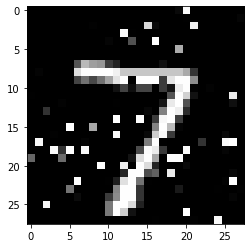

0.42358688
0.52917814
0.6027393
0.39239088
迭代: 12
置信度： 0.39239088


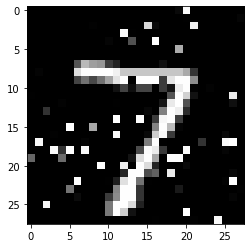

0.4639986
0.43045956
0.4424874
0.5076286
0.5167904
0.5231148
0.49547637
0.55307096
0.47196883
0.45620543
0.4513295
0.5058056
0.44535118
0.52286047
0.46816513
0.5975715
0.46740213
0.46866602
0.47950193
0.6791754
0.43381864
0.45154616
0.5818313
0.4901466
0.4097368
0.47651336
0.39864123
0.4353102
0.39580172
0.39680448
0.54956603
0.4518941
0.5294364
0.44297373
0.39235482
迭代: 13
置信度： 0.39235482


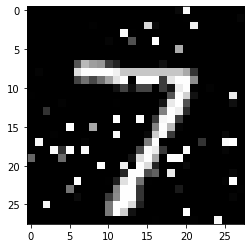

0.4210686
0.39926854
0.39235482
0.5793384
0.4539009
0.42980886
0.5579723
0.49922854
0.5229417
0.4469493
0.6009232
0.4615163
0.39236045
0.40308964
0.5559063
0.3928557
0.70158976
0.4647604
0.46679014
0.58282155
0.60398567
0.38824803
迭代: 14
置信度： 0.38824803


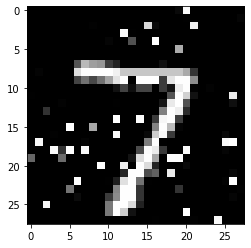

0.5798677
0.48253152
0.4908506
0.4173904
0.64234865
0.45478755
0.51111126
0.428479
0.5150756
0.5968253
0.5728802
0.42704213
0.41173258
0.5436932
0.54381144
0.42729366
0.47555664
0.42543167
0.4101005
0.49012375
0.4351794
0.45261008
0.5425005
0.4921068
0.46054783
0.51359665
0.42198676
0.62165266
0.622114
0.46012002
0.569247
0.42516756
0.46712866
0.42170537
0.5061265
0.66953766
0.46599713
0.4968087
0.44687533
0.5358735
0.5361601
0.4487071
0.44016844
0.5854071
0.5196703
0.48116845
0.47324473
0.5072134
0.48174614
0.48308146
0.4561964
0.5192749
0.5590864
0.4400276
0.55671203
0.6764888
0.5255282
0.44615582
0.49859774
0.40444043
0.53286654
0.67416483
0.54543734
0.5823857
0.4258213
0.41541716
0.46756944
0.42228594
0.42525813
0.47980997
0.44844913
0.48167294
0.50356144
0.46369717
0.49887863
0.603011
0.49462175
0.54085976
0.42756164
0.3954691
0.44260833
0.45220557
0.533753
0.60127985
0.55155873
0.50468355
0.42985067
0.5165858
0.5558323
0.5941491
0.5063528
0.48948213
0.41967696
0.4689102
0.4475102

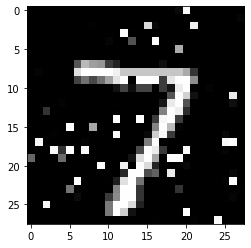

0.5090501
0.54041535
0.4638846
0.40014675
0.68150145
0.43424866
0.48047802
0.4697261
0.48608652
0.45146924
0.47055018
0.46441543
0.44526985
0.6214329
0.5281852
0.478629
0.45364684
0.43128055
0.4977466
0.4434339
0.44938236
0.412784
0.48483717
0.5208632
0.47881728
0.49239254
0.56139046
0.47081754
0.445232
0.4145188
0.44512233
0.477695
0.53140867
0.42777383
0.4906468
0.42889
0.5308816
0.49623743
0.51220125
0.40989313
0.47990683
0.49393576
0.4022953
0.44807997
0.41057903
0.46056294
0.39911878
0.41784143
0.504732
0.40563154
0.434391
0.5394976
0.4317017
0.3970215
0.41417083
0.54562366
0.56609315
0.44255757
0.40858003
0.41681048
0.5318845
0.49226713
0.47682837
0.44934803
0.48157185
0.41745645
0.5965224
0.45384392
0.49493963
0.54738253
0.5688267
0.558846
0.41808417
0.42979932
0.47247657
0.50380534
0.39427674
0.46882522
0.62284106
0.606523
0.51399016
0.54437596
0.47925514
0.5802538
0.5328422
0.47335216
0.41190642
0.42441717
0.54505074
0.53228045
0.48539484
0.47571677
0.4887213
0.49640447
0.4497

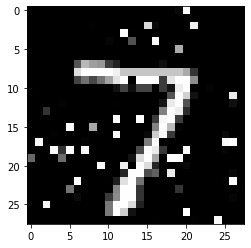

0.49916983
0.41499534
0.45360994
0.49234918
0.40118542
0.4185709
0.63053185
0.5653702
0.5693908
0.4514924
0.6270334
0.43324924
0.4256652
0.5123054
0.46548426
0.43860134
0.5483538
0.57811254
0.47279826
0.43119225
0.5418314
0.49819952
0.45573196
0.46460563
0.40640602
0.6014822
0.46685353
0.5624382
0.5323669
0.4072645
0.4785246
0.43323112
0.54455245
0.52469105
0.4416849
0.52252316
0.43608552
0.49706775
0.48466685
0.3880479
0.5009271
0.53976536
0.4190358
0.53577507
0.5333643
0.56854373
0.4577224
0.5139261
0.5334625
0.4748126
0.45231098
0.4527232
0.5351203
0.57598865
0.4310678
0.42555654
0.5404256
0.49805328
0.41623816
0.444201
0.39617738
0.4017748
0.52677417
0.57172006
0.5194409
0.5373169
0.41239846
0.38898864
0.4508411
0.44843218
0.47011712
0.5825033
0.57238764
0.594647
0.5145046
0.46783563
0.4696859
0.4196435
0.7118624
0.5193893
0.46715578
0.48803845
0.6185516
0.5038324
0.4040771
0.46172044
0.4889491
0.49997663
0.43694273
0.3919637
0.42105457
0.4589271
0.49371547
0.45371458
0.5751152
0.5

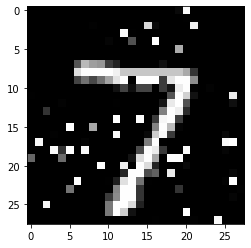

0.3910892
0.43268108
0.41432992
0.50921714
0.52099687
0.5540039
0.4290591
0.53765166
0.51852596
0.49066988
0.48409492
0.39740378
0.5129336
0.6182625
0.4828381
0.5293476
0.4410498
0.49424216
0.53708524
0.47889864
0.48929006
0.41733733
0.637152
0.48077306
0.51743835
0.53266686
0.48030612
0.43318945
0.48866454
0.40686557
0.4696411
0.5812903
0.49862352
0.4822206
0.5393957
0.5393466
0.45936367
0.5826357
0.57123804
0.42261106
0.54085153
0.43588668
0.5016759
0.38710296
迭代: 18
置信度： 0.38710296


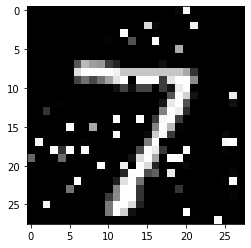

0.4193009
0.49447522
0.5491925
0.52684337
0.38715088
0.49178153
0.4438131
0.46357176
0.55202806
0.4464442
0.4533752
0.53915566
0.44807667
0.38941172
0.41580492
0.63005334
0.53427315
0.49341252
0.43990296
0.57292604
0.60538524
0.536966
0.59287184
0.52019954
0.55936784
0.45402825
0.57217443
0.4095787
0.45233727
0.5565698
0.46621087
0.5394038
0.5380046
0.40721208
0.3929755
0.54377216
0.48398873
0.5537291
0.516901
0.44443884
0.6146523
0.5200387
0.42540133
0.49976784
0.43022305
0.40551186
0.5092321
0.49805975
0.4717694
0.53528357
0.46376422
0.53143615
0.47956312
0.4947636
0.5611825
0.467973
0.5366961
0.43725383
0.40835527
0.44551224
0.52856123
0.5531941
0.46202245
0.45043293
0.6559735
0.5100102
0.48875314
0.5070903
0.44215098
0.4768916
0.4280834
0.53544176
0.46616253
0.52030003
0.43273813
0.5103556
0.4810675
0.5456307
0.6318852
0.39892793
0.5303565
0.48040554
0.43451542
0.43471768
0.49638894
0.4720767
0.60780424
0.3958196
0.43669915
0.46124417
0.38726172
0.68337756
0.48089537
0.5018833
0.55

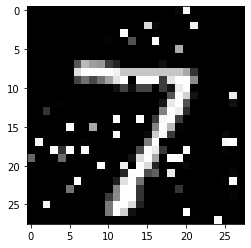

0.49500132
0.534895
0.48217618
0.44758478
0.5361743
0.4431625
0.5170858
0.4508014
0.45895877
0.43276197
0.4680342
0.5182009
0.5732296
0.47924447
0.44002184
0.4652296
0.48167515
0.42672375
0.54364526
0.47062978
0.4544532
0.5223921
0.5968035
0.4612114
0.49260506
0.42435724
0.49236375
0.42561442
0.48075658
0.45859918
0.41060308
0.5052892
0.51043546
0.43163016
0.49817356
0.44396576
0.44839573
0.3874446
0.46187612
0.42643723
0.55402076
0.45919675
0.467521
0.42287317
0.52836686
0.45769277
0.5890287
0.509797
0.6075552
0.4409399
0.47701216
0.41091898
0.5946938
0.42671213
0.39102978
0.45207977
0.44444057
0.40743878
0.42394087
0.5128431
0.46720007
0.62066114
0.4800521
0.5514681
0.40756378
0.41046637
0.46926484
0.40593278
0.4726626
0.5554099
0.502693
0.53730834
0.45441288
0.48680618
0.40230796
0.4414019
0.5598562
0.4399108
0.4278781
0.5138726
0.47575083
0.41154107
0.6639078
0.4021078
0.47639218
0.526282
0.47153157
0.5203134
0.42170155
0.4369614
0.4519471
0.5171571
0.47800848
0.4432881
0.46171114


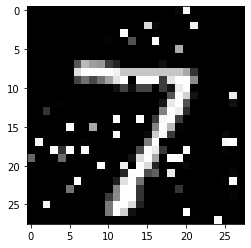

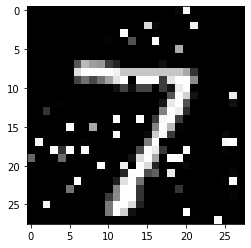

最终置信度： 0.3870019
[4.8938724e-03 1.7862909e-03 1.7645265e-01 4.1215670e-01 1.9462283e-04
 4.9812971e-03 8.6130836e-05 3.8700190e-01 5.8768210e-03 6.5697175e-03]


In [11]:
# 原图改变值减小置信度
import copy
x_t = copy.deepcopy(x_dif)
count = 0
for t in range(20):
    x_f = copy.deepcopy(x_t)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    y = random.randint(0,10000)/10000
                    if y > 0.3:
                        if abs(x_f[i]) >= 0.8:
                            if x_f[i] > 0:
                                x_f[i] = random.randint(1,6)/10
                            elif x_f[i] < 0:
                                x_f[i] = -random.randint(1,6)/10
                        elif abs(x_f[i]) < 0.8 and abs(x_f[i]) >= 0.1:
                            if x_f[i] > 0:
                                x_f[i] = random.randint(0,2)/10
                            elif x_f[i] < 0:
                                x_f[i] = -random.randint(0,2)/10
                    if y <= 0.3:
                        x_f[i] = 0 
        print(Func(x_f))
        con += 1
        if Func(x_f) < Func(x_t):
            x_t = x_f
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_t))
            f = x_t+x_test[0]/255
            plt.imshow(f.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f = copy.deepcopy(x_t)
    if con == 1000:
        print("迭代失败")
        break
F = x_t+x_test[0]/255
plt.imshow(F.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(F.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

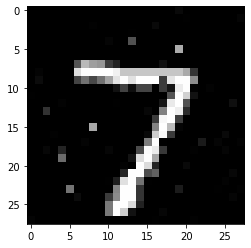

置信度： 0.9915788
[1.7897421e-04 7.8683530e-05 2.5379681e-03 3.7627937e-03 3.4610137e-05
 2.5549883e-04 1.4917206e-06 9.9157882e-01 1.2687287e-04 1.4443595e-03]


In [22]:
# test
import copy
x_f = copy.deepcopy(x_dif)
for i in range(784):
    if abs(x_f[i]) > 0.8:
        x_f[i] = 0
f = x_f+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(f.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

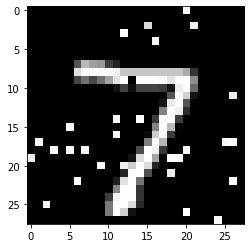

置信度： 0.6870139
[4.0159053e-03 8.4399205e-04 9.8695733e-02 1.9871697e-01 9.7408672e-05
 3.4160041e-03 4.1627871e-05 6.8701392e-01 3.2542781e-03 3.9041170e-03]


In [12]:
# test
import copy
x_f = copy.deepcopy(x_dif)
for i in range(784):
    if abs(x_f[i]) < 0.8:
        x_f[i] = 0
f = x_f+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
result=model.predict(f.reshape(1,784))
print("置信度：", result[0][7])
print(result[0])

0.6883453
0.7775387
0.73519343
0.7044756
0.6883453
0.7920578
0.7956361
0.7700912
0.7487663
0.70755655
0.7687929
0.78734714
0.736953
0.72441804
0.7061354
0.6870139
0.7249257
0.7249567
0.72367847
0.74286026
0.83723503
0.72861534
0.7487406
0.7801557
0.7109055
0.78152376
0.6870139
0.7465261
0.7061354
0.81536293
0.7631694
0.6904267
0.7350919
0.7185388
0.8282139
0.7625782
0.7394243
0.78696346
0.78254384
0.7937635
0.8464237
0.781874
0.8081971
0.7908187
0.6970819
0.82343715
0.7707743
0.7539602
0.79672503
0.72733986
0.83760303
0.7118702
0.79813373
0.7929544
0.7641357
0.9050781
0.77432704
0.7107555
0.7444644
0.7786722
0.7859261
0.71370226
0.7876696
0.73986685
0.7093259
0.8504413
0.75970364
0.7368277
0.71783704
0.7470777
0.73356944
0.7163302
0.8766994
0.77371055
0.76690584
0.7475542
0.71719044
0.7381714
0.7109055
0.77090997
0.7290454
0.79634285
0.76273346
0.8510095
0.73384047
0.7231812
0.7605636
0.845184
0.71484935
0.74432087
0.6909602
0.831641
0.7751207
0.7109055
0.7745143
0.7487969
0.78697044
0

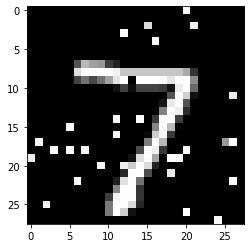

0.8332165
0.8424453
0.71895516
0.8065041
0.7799553
0.7751236
0.7332606
0.76096594
0.7540764
0.7577248
0.737526
0.7449031
0.6913646
0.7532132
0.8098466
0.76492465
0.80425435
0.780032
0.7767382
0.8405036
0.7644426
0.81492704
0.8245986
0.811735
0.6920835
0.76570225
0.8591394
0.82866603
0.8131356
0.75118804
0.78191596
0.73216295
0.7427987
0.8557031
0.7531131
0.7667982
0.78055704
0.82070965
0.7968565
0.7380093
0.85944843
0.7874195
0.75137335
0.791341
0.78953815
0.8337768
0.7836157
0.75842136
0.78319806
0.8181172
0.8325034
0.7913154
0.845115
0.8335539
0.76521575
0.7546619
0.8051758
0.73676217
0.83811355
0.88916194
0.77152497
0.7138275
0.7121518
0.7793035
0.7576798
0.74197555
0.7380093
0.7715738
0.7523862
0.8288978
0.82399416
0.787908
0.8836533
0.7202945
0.8086286
0.82084
0.7288592
0.7723471
0.7320863
0.89151883
0.72186303
0.7879651
0.809282
0.7881565
0.6865613
0.78956664
0.75326806
0.8843312
0.71360636
0.8492078
0.7904606
0.83901393
0.72146857
0.7170294
0.6865613
0.7915774
0.8393786
0.732975

0.73029673
0.70206255
0.7766503
0.9040521
0.7789979
0.7681854
0.82171047
0.79314643
0.79778695
0.7917918
0.842104
0.6865613
0.7325582
0.78347707
0.76194483
0.7316957
0.7512275
0.7121518
0.79094476
0.7296076
0.74552304
0.773056
0.88103867
0.7138275
0.8967265
0.75536025
0.7989251
0.8422128
0.72660905
0.7762544
0.7320863
0.8356357
0.7268704
0.6865613
0.7588673
0.73962885
0.7138826
0.75864977
0.76410735
0.8083348
0.72128004
0.7520184
0.71746475
0.7839158
0.80545634
0.7579875
0.70430326
0.8116208
0.80312604
0.75127155
0.79230744
0.7549401
0.7305695
0.8044147
0.7851778
0.80382925
0.8345036
0.7828146
0.7404524
0.70651907
0.7047052
0.71832216
0.7428264
0.8057815
0.7947231
0.6865613
0.72840375
0.7620063
0.7840931
0.7807948
0.8312598
0.8433982
0.7763875
0.799816
0.8481673
0.7729242
0.8122518
0.7375052
0.7090057
0.73979175
0.77958053
0.78085667
0.79165554
0.79683423
0.79416007
0.7305695
0.7080245
0.8010677
0.77339524
0.80654955
0.7873975
0.73731154
0.6865613
0.7116419
0.73212415
0.7704056
0.70470

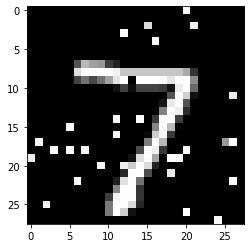

最终置信度： 0.6865613
[4.0811286e-03 9.0530323e-04 9.5967904e-02 2.0140010e-01 9.7581236e-05
 3.5848608e-03 4.2860938e-05 6.8656129e-01 3.3762802e-03 3.9827535e-03]


In [13]:
# 改变值减小置信度
x_t = copy.deepcopy(x_f)
count = 0
for t in range(10):
    x_f1 = copy.deepcopy(x_t)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f1[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    y = random.randint(0,10000)/10000
                    if y > 0.8:
                        if x_f1[i] > 0:
                            x_f1[i] = random.randint(1,8)/10
                        elif x_f1[i] < 0:
                            x_f1[i] = -random.randint(1,8)/10
                    if y <= 0.8:
                        x_f1[i] = 0 
        print(Func(x_f1))
        con += 1
        if Func(x_f1) < Func(x_t):
            x_t = x_f1
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_t))
            f1 = x_t+x_test[0]/255
            plt.imshow(f1.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f1 = copy.deepcopy(x_t)
    if con == 1000:
        print("迭代失败")
        break
f = x_t+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])

0.81101584
0.8488225
0.77846646
0.7158132
0.8419784
0.7974514
0.79938614
0.73174554
0.80849224
0.62072563
迭代: 1
置信度： 0.62072563


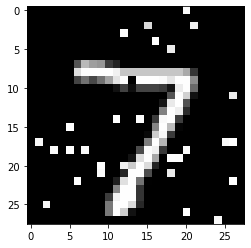

0.7964991
0.7001411
0.7683057
0.63502413
0.67775583
0.6943031
0.7353793
0.85470647
0.79101753
0.74285406
0.71102524
0.7960202
0.6909141
0.6675845
0.72165316
0.65796816
0.7462667
0.7384828
0.8046991
0.6929416
0.68540823
0.860213
0.6950039
0.67247486
0.5867367
迭代: 2
置信度： 0.5867367


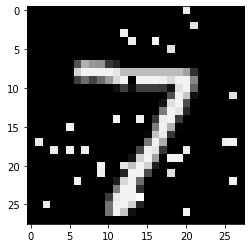

0.7731855
0.62691295
0.57935023
迭代: 3
置信度： 0.57935023


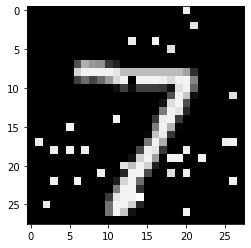

0.6906394
0.63526094
0.62659264
0.71634847
0.64833534
0.69735456
0.7151559
0.63221574
0.61099887
0.76324403
0.73315173
0.64873403
0.7632174
0.76555836
0.68433213
0.6570548
0.718703
0.62044656
0.57511765
迭代: 4
置信度： 0.57511765


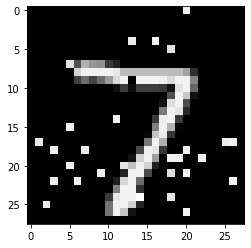

0.8102025
0.65366405
0.6736907
0.7873414
0.5709075
迭代: 5
置信度： 0.5709075


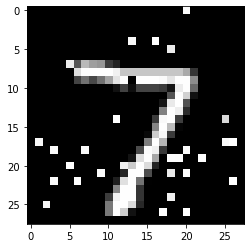

0.74739033
0.5709075
0.69471824
0.8248632
0.673524
0.77106553
0.70542073
0.70224375
0.5979339
0.88066053
0.62593627
0.7577795
0.6926609
0.7375381
0.76319677
0.7286844
0.7038457
0.838356
0.69680995
0.63089263
0.76571816
0.7127004
0.5460625
迭代: 6
置信度： 0.5460625


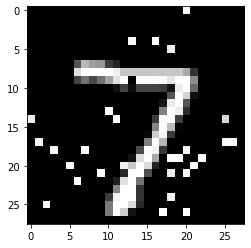

0.70496106
0.70674115
0.67115754
0.6050767
0.7283347
0.5254193
迭代: 7
置信度： 0.5254193


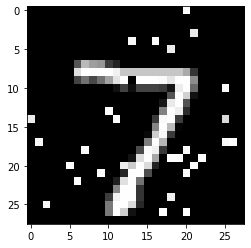

0.4912182
迭代: 8
置信度： 0.4912182


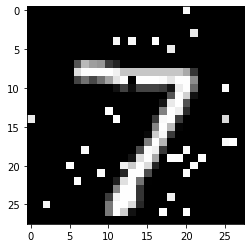

0.6664777
0.6451097
0.7703712
0.35655084
迭代: 9
置信度： 0.35655084


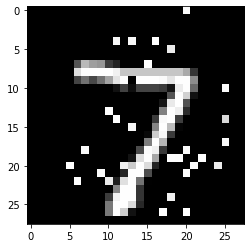

0.5205986
0.51510656
0.81824327
0.3797486
0.42053238
0.40058044
0.41386804
0.55349755
0.38773814
0.42579275
0.4141163
0.5858768
0.507337
0.61266667
0.4867385
0.606969
0.55294424
0.66439074
0.5280004
0.4041991
0.350669
迭代: 10
置信度： 0.350669


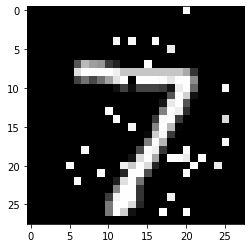

0.6873782
0.56462
0.35236388
0.59480065
0.6063461
0.58717996
0.350669
0.47488773
0.5916126
0.43706542
0.350669
0.52006024
0.511328
0.6835792
0.535357
0.6869955
0.69988877
0.4811724
0.43365633
0.350669
0.5022705
0.424426
0.350669
0.6433739
0.52791905
0.33598253
迭代: 11
置信度： 0.33598253


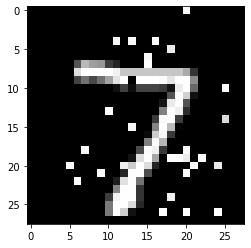

0.5660086
0.33598253
0.6816482
0.60385025
0.39283952
0.6233978
0.41335768
0.51068085
0.4627721
0.4515701
0.47460198
0.42491055
0.5536302
0.46923935
0.58146286
0.44746917
0.55766636
0.42231464
0.5039851
0.53976744
0.43797752
0.61185443
0.48361942
0.52862525
0.3938908
0.6326472
0.32691327
迭代: 12
置信度： 0.32691327


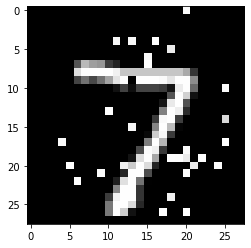

0.46962652
0.32691327
0.5792458
0.40215957
0.37638098
0.3965173
0.61730814
0.364487
0.3767804
0.58278507
0.5873086
0.5030744
0.26164922
迭代: 13
置信度： 0.26164922


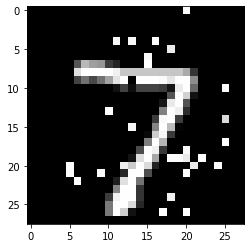

0.5211512
0.35537857
0.49423343
0.45417792
0.32397518
0.23259728
迭代: 14
置信度： 0.23259728


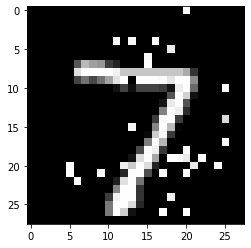

0.49117333
0.31914306
0.4182433
0.28709823
0.27730268
0.460654
0.6035351
0.40337965
0.3436662
0.3565559
0.28981707
0.41203576
0.34765476
0.30514485
0.27224195
0.5025005
0.23260948
0.2801481
0.28510475
0.25253645
0.44364855
0.23259728
0.24137425
0.23000304
迭代: 15
置信度： 0.23000304


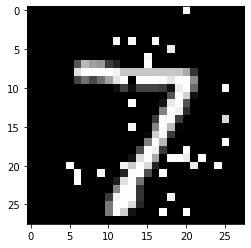

0.6117528
0.2947325
0.26269013
0.5695411
0.234201
0.31284004
0.32872674
0.23000304
0.27869454
0.3963377
0.3830151
0.35644075
0.52196455
0.3657746
0.23756982
0.23000304
0.47217527
0.5290969
0.44069448
0.28090656
0.32686916
0.38843188
0.4596482
0.3935513
0.4083862
0.23000304
0.3218553
0.2332775
0.34949142
0.23216331
0.7241617
0.25947583
0.6566678
0.33771694
0.33265105
0.23000304
0.5293415
0.2793703
0.43855527
0.2391955
0.3386023
0.42780298
0.42385083
0.22960134
迭代: 16
置信度： 0.22960134


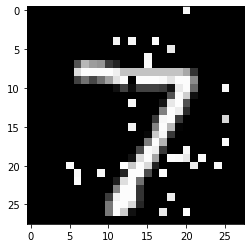

0.42194
0.39041042
0.30524564
0.36697963
0.39115646
0.20726967
迭代: 17
置信度： 0.20726967


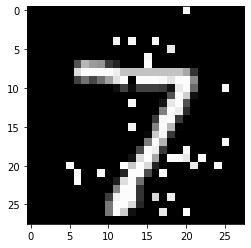

0.37276927
0.3118323
0.3077094
0.39555475
0.4359189
0.39613268
0.68250376
0.29396898
0.3037736
0.30093637
0.39343983
0.37389338
0.2604569
0.63064706
0.3795314
0.2510873
0.7570712
0.33061793
0.41043392
0.19506694
迭代: 18
置信度： 0.19506694


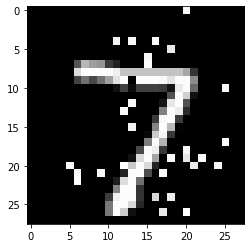

0.19506694
0.65376484
0.17898476
迭代: 19
置信度： 0.17898476


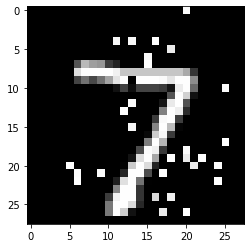

0.2560051
0.28152245
0.32203484
0.39622203
0.3227724
0.21275473
0.30910727
0.23527919
0.28968427
0.27352268
0.5553224
0.40601662
0.1809899
0.2632746
0.37506175
0.17898476
0.4511277
0.40286228
0.4901173
0.1791834
0.35309827
0.6111627
0.43611646
0.57487404
0.28351125
0.5217376
0.21538615
0.28870097
0.17898476
0.46258336
0.24679661
0.3632255
0.46328822
0.7196547
0.5447455
0.17898476
0.20026694
0.27210972
0.4092792
0.34669122
0.65030396
0.31377223
0.2884543
0.35179818
0.19786885
0.62317693
0.24915022
0.22195439
0.2043431
0.15232702
迭代: 20
置信度： 0.15232702


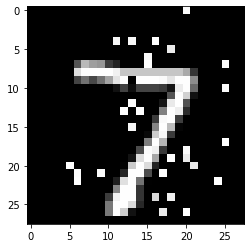

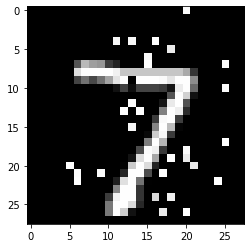

最终置信度： 0.15232702
[1.0227925e-03 6.5359607e-04 6.4958043e-02 7.6764780e-01 4.5628898e-05
 4.8013278e-03 1.0952606e-05 1.5232702e-01 5.9375139e-03 2.5953231e-03]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.98253157 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0

In [15]:
# 改变坐标减小置信度
x_t = copy.deepcopy(x_f)
count = 0
for t in range(20):
    x_f1 = copy.deepcopy(x_t)
    con = 0
    while con < 1000:
        for i in range(784):
            if x_f1[i] > 0:
                x= random.randint(0,10000)/10000
                if x <= 0.1:
                    x_z = x_f1[i]
                    y = random.randint(0,783)
                    f_y = x_f1[y]+x_test[0][y]/255
                    f_i = x_f1[i]+x_test[0][y]/255
                    if  f_y >= 1.00000000e+00 or f_i >= 1.00000000e+00:
                        while (f_y >= 1.00000000e+00 or f_y < 0.00000000e+00) or (f_i >= 1.00000000e+00 or f_i < 0.00000000e+00):
                            y = random.randint(0,783)
                            f_y = x_f1[y]+x_test[0][i]/255
                            f_i = x_f1[i]+x_test[0][y]/255
                    x_f1[i] = x_f1[y]
                    x_f1[y] = x_z
        print(Func(x_f1))
        con += 1
        if Func(x_f1) < Func(x_t):
            x_t = x_f1
            count += 1
            print("迭代:",count)
            print("置信度：",Func(x_t))
            f1 = x_t+x_test[0]/255
            plt.imshow(f1.reshape(28,28),cmap='gray')
            plt.show()
            break
        x_f1 = copy.deepcopy(x_t)
    if con == 1000:
        print("迭代失败")
        break
f = x_t+x_test[0]/255
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])
print(f)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.98229893 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.9968932  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.97825824
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.98931624
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.9850986  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

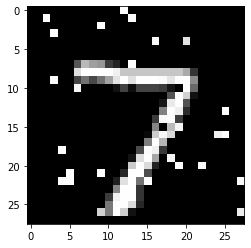

最终置信度： 0.963738
[1.0808634e-03 1.6884957e-04 1.6368348e-02 1.6524410e-02 3.9927374e-05
 1.1119458e-03 6.8982681e-06 9.6373802e-01 2.2268597e-04 7.3817343e-04]


In [14]:
x_f2 = copy.deepcopy(x_f)
x_f3 = copy.deepcopy(x_f)
for i in range(784):
    if x_f2[i] < 0:
        x_f2[i] = 0
random.shuffle(x_f2)
for i in range(784):
    if x_f3[i] > 0:
        x_f3[i] = 0
f = x_f2+x_f3+x_test[0]/255
for i in range (784):
    if abs(f[i]) > 1:
        f[i] = x_f2[i]

print(f)
plt.imshow(f.reshape(28,28),cmap='gray')
plt.show()
res=model.predict(f.reshape(1,784))
print("最终置信度：", res[0][7])
print(res[0])